# Hashtag grouped bar charts - Fake Covid-19 dataset

We've used the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
import itertools  
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
import csv
import itertools

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


In this notebook we are going to visualize most frequent hashtags and we will classify them according to type of tweet that they're in.

In [ ]:
index=0
cmt_list = []
#stopwords = set(STOPWORDS) 
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        token=entity['text']
        final_token = token + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "")
        cmt_list.append(final_token)
    index=index+1

We create the pandas DataFrame and then we work on it in order to create a better bar chart:

In [ ]:
fdist = dict(nltk.FreqDist(cmt_list))


df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
df = df.rename(columns={'index':'hashtags', 0:'count'})
col_one_list = df['hashtags'].tolist()
col_two_list = df['count'].tolist()
typelist=[]
namelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    if tok[0] in namelist:
        indx = namelist.index(tok[0])
        if tok[1] == "false":
            count_false[indx] = col_two_list[index]
        elif tok[1] == "partiallyfalse":
            count_part[indx] = col_two_list[index]
        else:
            print("errore count")
    index = index + 1

del df['hashtags'] #clean column
df['Hashtags']=namelist
df['False']=count_false
df['Partially False']=count_part
del df['count'] #clean column
df['count'] = df['False'] + df['Partially False']


df = df.sort_values(by=['count'],ascending=[False])
#print(df.head(20))

We visualize most frequent hashtags and we will classify them according to the type of tweet that they're in, we have filtered in the range of a minum of 10 tweets to a maxium to 212 tweets total (which is the maxium number of tweets created by a user in the dataset). <br>
Every bar is colored basing on the amount of tweet written per each category (False, Partually False). 
<br><br>
We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**.

In [ ]:
range_ = ["#0C7BDC","#FFC20A"]


bars = alt.Chart(df).transform_fold(
    ['False', 'Partially False']
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title="Tweet count"),
    color=alt.Color('key:N', scale=alt.Scale(range=range_),title="Category"),
    column="Hashtags:N",
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Hashtags:N', title='Hashtag'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[12, 212])
).properties(
    title="The most frequent hashtags classified by category (False, Partually False)", 
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

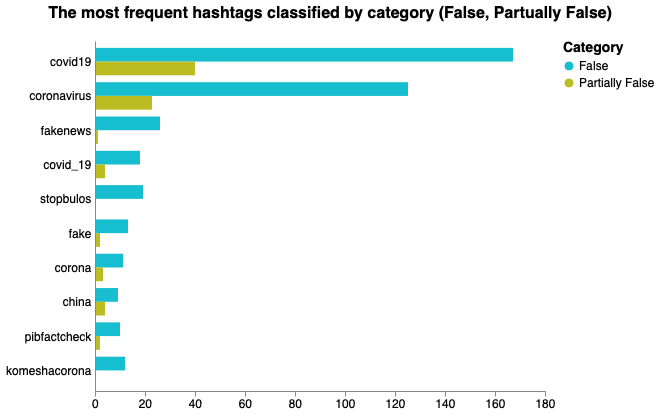

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiYdAM0VwAjgzjijMJBCxIyEHVAA29iDWM04snUwAnq5ImORsisEAFABiSG4QcFI6AApIipgM8W7BcQlwAJTSIADuNLL0aAAsAgAMMvA0ZFhoAMx1MjhIsrI04mRoAjJqmG5waKBhAB6YaCDacHoGRqYWVjY6dg6YTi7unt6+-kEhYWQR0XmJyWkZWW45OleFxcYSmADKNABe46gAjAA2GRsYzGRKzVAAJlqAF8ZLJQihUABtUDiJAIP4gHZMMbFYjxKwQNBokAACXsjmccygbGI5X+AE5is80ECAOwyW5qbK5eKJar1EB0hg2NAwjnw0CU7a7WkRCRIBmKBgkmRsgFQoYgHk0PlPAV-KGtGSi8UAqoADmlFKpOxp6GMSAA1tY4CV1SBNVDgbr0ryHvz8uyzWwxZCoVKpDL7fL0HSGbIAPrM1lG9lW7kB-VBw0h1BVMMRiVQ22y6kk9CGNg4JgMNwGdMF5nZjK5x6a4XmyHM8txx0gZ1u5uCgGm-3tg0+4sW-4Cftywd0xRK0d-f7-NuBzsZ1ATnvsqqLyu0mB9FAavdM7cd4Njosi8Nz1onh1VkA4GhMZ1QTCwOAoBddd2WFPVpz3KFZ17MsYztJcPxdNgsQcJAVzXK8Wygycd3vP5u2fGC33jEBDCQQJQhgZDxkwsdN1vCCCwIksAX+YjBwUHYVTVRscAMaiQIBMCc0YsdmLnOE4Ird85hKBg7EkWi-i5HC73zMcD0I0D2I-RNyhhNMlLQLNVNEjdoLQJkdIVJNBJvUy8y7CzUCsqSB10+lygAWkM71rwYxy93EyFXNjBC5j6XokB8ZpMGgRUMUElTwMCltnJtNzwurHZAiorFBJMlLdyY9LrITBLlRoVUxAYTAmDMV0koC4q6NKzLT3QQJqLWPw2GsKB7EvPyCwnIq8MGNqwo6odXXdT14jgDJBJ1Mb1PMp8WMBMqn1XDFwzqhrgKM1AVpE1LWo2i0tvamT0AMplxETZbmvGgFnOuqbbtIthMmehyWvw5yFxukjGyA2Q2BKRThofF61tDS7IWBz6SPrVVxF6P7VqcxHBm25BEQoaB0ixs6AbQYK8ZBwd6zGaHNVOqdzsB3GTu2vTZGZSL9UEx9sb3LdWeR+DpqQHAcA8NV+Lccp0nYQThKZ8nC2c49qY-Sw-Dgfr7BomH1v5kbVe26LlAG3m4Zxw9C22ko7DisWcAt-7Xspm31ZsxkmTgeh2C-IbNVGsnXsF621ZRwcaxwDnBOww2x2wsOTbGJbjr54P4dQN3w5Fr7xFrGgoGd+OWaTj30AQGgZZ2SJi4zq2tPdiOP3oBrZDrpXXeN8vSK6PpBKDzvM9Dxuc+kkjLHSJAbD6PXNXToeG5Ysf3LmMQoFzXoyMevoBmOwfcMzt3Xx7x3JfXtgxj-GhSAVy2900liT+b2T5OnnBxDgBh9HEHn9-vkqrNn651RlXH2Pt-i1CgTgBQTZ-4uyPs5YB48aaHV3p-T0A8AFiSQdtR69J7qx2weta2yDV4JmYAHSCxCEakO2mRQIEBopzwfjQrOuCe4unziUegcBfxxSwQgpeFoyFZR2kqbiEAGA4ERGEIhQiBYcJfugHYbozAQD4uILwTAq50ECIIkuFMlEgNQXAV0u95GGLekA5OZBFp-31m0Nhx92aeU5kyfa9UzFHUcdCNhI8n7bToPEfRx04710UTYnuA1FDKmnk4NgOjFr516JXLwEgDERMAXQnuMs4BMEWnfBRRsonKM-OeBwFj4FWJcT3AAz2QDwTQYAYhgAAS6qmY8Q9NWHFJwaUkxulVxQ0EoLKxidG6iOmlkFhgCrGPxEezdIfBa7VKyf0nJZSxhMGnhktZi8grGJQR5XalVqpdAxogQulj1ml0brBMpLoGAlCQHQUZ-jnIPMGQqU5kimE3IOdk+521MBsDsbwxQJRvHWC9JqMZtzaHAuiW4phxhZkJ2cZ8vBbB0IYlpgYSgALD7CMjNtAQe9fHhMBRspFZTcVIGkbIhQ3MqFpT6SQ2l3z0BIG+HQGAq4ECBA3j0uZCK-Gsy+ccn5Eiqpqj6CyolakSUSnZmbN0swwmYolezc8n9BSavZUY7VPcmG-xrqE3x8LqUcpYpK8hIBwxmC0ei40WrrZ2rEWfBl+rLUfONWU5AihFCKrMka9120zB8VTr6w11jw092QBAHxM5Y1uw9dNQCkN7AhuZmGzlUr0AwECLIVcUwhUwEbKuSws8c3KzTfQuw8BrA7OaDgVcYRDC1q7v6rlIAsSyDFDQMo1gu2IJ7QW0imAnVkF4TYeAGI1B7MpW6-N9rEiKAZFAF1EoV22tcUmZkCgLmsoxamrFyKD1MjdOICio7lXQm2jgZgMsALxEqAamp566UotBXgMo9B8ofrFfW5FvzZUQAagBCA8g3DnjvYc8d9rhDTx2FABgig0UlHg0CvdoGZXVQJsoduQHrV5tw9+sD1Uj3xOwzS8jvb6WSKPbRu59GJ1wFIDYAyRTxlfoY-SXyKbP2IbES8jRYs3GCeoWekT00pEY3IvQcMsVYXSeE-GspPVZDEB42KiZbH7V9GMG4dY3wT2upkxp3tXQXQ0G3ixsjFp01fXpRu8DDn2Gybzlmi1QngN8YnVwyGXV0P8NUwWKlxKENWYnRzMweSfCKHC6e9Tq7RNUhC4oBSshksWdSwZsRMDFAAC-DAAEPxDEinYNfOuWd2WbS9NFlGJFCCo8yBspGCvDQBoL1wlJGos4aczqytbBq2f3ebGgJw2e52zYO1gL9qXTLZhDCBbXmSIvNiRQPohhJHrZi-a+g08XR1c87xjbkccqoq-hSvzpHPOHbERyLrB3GtfXSHYmw1gGW-0RP15dDWCvTUY+BhVA2lXRfeyRZ0iQZYFMUAjnYxHAf5Zm2UqqZ3IuQ6G6S0+xgnYQ9DY96Hg5weo-85dj8OzZB2KS7ph7+n0f8cvf8onuaSfA5cxVRloRmW-wxg4+7g26PM4nfAN9MASgRDUVj3dYv7Uc0AD8MUmIvy7x486wt72d1sW2IphSXExQkm1Y6bGve0FLcLQb+b2uckXpa8jE3wGC6JdOZ+raPzcTvkNPZMgByMEACJggBSMEAKJgfvACMYH7wAVGAm7FWblVPcJduHfb4xWIuLNPemvVNUcO5dA4V2I+LvhjD5ynXAWsI6dfdsz19fhAEgKx4e-Hh9PdehmD-Lbgv0zFBfY1TG03evppIUvY39PiK7eDkRNLtgvR6pIHPAgTvXv7UI9CA2JAaFJMsmOlasfcbScnKVMmCAv8G-HTTzj09NeSLCBoLZ-oHokBQrKJ-AHwvL+sa719BA0BVu1CXwnppjMH0NfBIGYJbjLEunCuruyBGvPg2AOggHgMgHYLEtsLEgznvs3mxD3MIN-CgQgJQrEsmghgPqzDgRjsoD6jjGQdbBQb2uwOoqCgNGzv3pTnQaqhyKPh-o5r2BGkeoBH3tAfnnwSai7hvPIEwMhAjmdhfsTtgdtMZhELLNwcTm7PQROq8j-qoRzuoYoSZjobruQdtHiJFHqhAMmJYYYdXo3BoSvmwGwL8DAj0CnLIX6hwa3pEDoqgZgTwfvixHYWIliPTjvjAQCNtDLJYBEG2mwOeDoouiKv0rQbYXgkwFIjInzm4VNs5IEXJpkEwL4fITkfQukGdrvn4XoT3Lwh4B2kIZEp7rAbNtrG7hvGoL8OIG-vUewSkRel7MxqESIY0VsjitYWOh4RRvhmqLANkNYHYp0Wyg0eEafEmgoIgG2uXr-KMferkV9CUFQW6DBmMDQJXDsAkWUWETsfbqqN8KuMhvMRdIsZcZHNRGhjsvcQbN0QESbAAI8SBWDECXxijpDvEIyPHbS35bFQ5fHRIKQUAYwQGQm45DG9oMKUTURMKkAyykBZHJHQnfpJjsACLn7uE9FlLZZ9DZb-qMBwmIiFEc4KFVH9AzqImi6iGPJUiVzBoDFgk9zVReDu7WI8l0rxKRB2YeAYznGDFLFlKJBobKCYCBBvCKBbqSlCm9oMA0kClyH0nFFiHiwRB1ELGfFzjbSzGzyFLcnGlskomvKVosmf7WkTpiBuC9AWlsEPaVFlL1h4EIBowCnlFqG6llKhDmyWkelBm9q9CulBpID7T2m8HImxaYiLQOGJEfHhnGE9wcbBJwBuCg7VTxmc4mk9zDhwDJivZhl76eks76S1BcyC7+kXHbRISnJP7ubEnZGZllJ-EIBTAcyq4PFWmJn2pkAMC9BdCyAvKFnVkTq8J8QvrbrnZx4RkTrIAeDKBakkl4kMENkxRYDxSUZqjTkrmK4VSSK7aNlSlPG6SoF6LJjHldm9r2DHFdIPnjE2m6L9A1hmB0nKwMkymLSbqrFTB0BwKp5bnFlkkpkKBeCPRiybmdnvkTqmDTxbq-khwnliJqgIW4mQW9qNgYxQGkHLmPne76itbzaVkVGYXTSJZ8LNJhBcngWIWkm9otYYhQBMBpmglDnSk7kQx6pC5dEZlIWK5cV0g2CxI4pnkAC3BZVFgZpFa6ZAWW5ONBJFolYigAQnCAAgcIAORwgALHCAAocCrtvu6VWTRV9GDC6BDFDGpcRU3pZaDDijZZDOIFCP8OhcPE5YOG6PoKhPSm+axROrVtVoiIQaqbxdeXMImkhA2IuQGboT5R+GIIEGqFkMoJRcxbhY6faj7ijsIWqbOWKI2KgfYHxNoviB2TlcOWIvnDssIIgAYB4KOekFFF5cIZpXkeRDdqYMhKqPoOhpFSJcFfauLAlU2VmR4G4DgHYEFdubFrIEXApUlUpWIn0IxWirtPNXhROshm7hkJeUVfanYL0GwPEDQDtblWIhLhkF4uYv0FdbVdNAvl5PAIoF5G8itUYV1dzpeqoE9XxbOQ9ecPgqcoDdFSopxLUbURDY+rEoqREFAKuKEEJUaSNQtfamYhkDAJPCON9TYZjWIsjedbyHDSWZWrLGKGsY2IEFiOKATWMaNcTW4qmEyPZejRZWtdNE6mXgluTRMRiJIrzh2gLb2tRt8UdVFUsh4FRDGSCYKdLbyUgMhoYApMmNMcQcmHYJdYzdsful7ChY9BNVeQbe4rAGLYFhVG2VRovtVRpczTzchNPGjUkQ7UTdNBQN-LVBgXrVCbtaeYeRAMQBYUwHYC6ESeZdRdzV9PdffmQDTpbfas6CGH7UiUDYrpQjBUSAVcJVzb9SRMgOIHxFRNxYrRjQHXVUNSbcdWIl-KuDAknSzZer2U3XJtREqTsMnvEORPIFFAkW3V9IACJwelgAxHCACMcIAFRwulWlo9gAmHCABMcJPQvYAERwgAeHDj1z2AAYcIABxwgAMnCADCcIANRwgAhHCAAScIQvbY5THfbrqmckeVfVgcldKkLeBlOrVDAB1ZEgXcuAlJMcNfnY7V9IiFXIEHkoPajB4EBBUqCpED-CnoVUrWUkwRED7PAACXImnayc9V9IAFwggAfCCAACIPg4ALwggADCCABMIIABwghDgAwiCACCIBA4OIAM0MgAtwyABTDIAGUMgAJQyADXDIAJ0MTDH4gAKvOAA6HYABkNgAKD2AAu44ADftgAJUNCNzCACroIAJuggAF6DKOACHoEo+gIAAWKgAA06ACjroAEvWujIo0AgE5j1gSY5e5jItNdSDbF9IuZ+ZD9UdilP9h+r9VGAD0dXjcwDjfjnjQDoCkMZimiX9bKAT5Uu051+2WDDpOD9uZ54GsAF45jckCknih0mTb8YN-95jUAtOWQFEiUiTCZGdhWn838Egrt6ZgDHtX0jAM8j1FTRZ110065PKdSNgxACtiVP1oTg43T3wEgdIAzk1ZSA6Ty-QwRiaRTqT1UkzptvRsg90wSMsUtFdnTVl5A1gOW5j79SBaMuYX4kd6l19MTGAZiyeMASp2Q5j+CxAf+5jKlPslEYoCOd2ed-jwz1O7AjYtAA0bgW2fCyyUTF01zqBhIigudoqVz-ztIg68QkLNqld00pAkQqB8Lg5OzyTNMi0FA+gizQdmz+oKztd0085JmA9j9fh-51mYoyGBR9LRRN9k+N85Q+SgQvwq45jCTHjq11zElYQNgEAA5DTfzTTJEMRsN7TM5J1EYu8oK4gBSaEn9Crz95UBJP0aL4+GLLmyyxgDYHNeLjThrhdfghcqLWrHLH4GIZAT6TFiD+LVT00k8sSrTcAUaYMISwTwrSL1YYoiIdNEQAuPznN0rlrg4ba3L5jxxUaOwDNQrQzMrv9bm7i5j54sUVEGp+5+r-hMbH4SevsCg5j6RSbVSqbhNxbcwXUuZNAwgl88QlLTjsWEQEMhIFbpx71PdC66grbmTfgeqobZQ0GyE5jOA+gaDfs9TRqNV7rX0xMdtNbTN6bH4T6agZdgztbuzsrzLrow+4G0imD2V7tdb6AZQaK5jtNb6vmvzITG7nsvQDZ1jMwMK6g2b08k5VI1brrFr+7g4Zg8gXgZAv8tra7+tredm+wL5igbbbrkNIAfgDAA0CRPgGIO8i0VAizl68gCt2pf52rk6P7VJmzD7UbT7l7GABg5zkHAH0bQHLc7wM+uZ+K5jQaEAAbabNHXQVB5jaEYQHI-+dr1ztAYwcUyG1NPHe7BLLcFahbjLE6ZQbgKEU7q4Kpsn67fH6i3LKbjH1HzHEUUAdNutUH-txnsT-9MClylc2zgH8nL9994mGIyAiHjnS79uaE9giSsSEMLrj7gbz7wbCmjCfEowDF5jsggQJBVHwXNHbjEAYWt70hbVlH5rTHTn2UDUlcbTFn6dyHoOWbYnQbT42mfRrnDnWXXnZO4gbwSXFbi0Oi1XRn2XOIuZ08cJ0UDFB5GEBX2DtXH4fJ+oO7Uz-GQd1GgX8XvHVnIoei5oG8CQArC0O8rXCXc3UAUAhOA3STQ3cwlg5jSpHGi05aVcuLUrbX+3FcPdjC875dnnyHOiCdaC+XhnG37X0u9NoIqETaarTgmru3lTyHv32s-3zQ5jyGCAhBP7buDgnJR3SNfCHzbgHnNXyHWT08aK-QAEb3QXs37XOysShBDw63BP13pQ+T6T5TQPHTn3VPqT7j735PyHoQYrdLtPirYi1ltl4grQCbxAFWoN3wZW3wRzUwYwdiizhgdIw7ennabLOp9rEU9YMR2PU793u7Onc3hIW3s8EA0uigcXmXV3T3yg-QyYfET6NR6gorq4bgOiDwmTfKgGnPJH5guyY3qz3Z+c3S4YphOHXQ2n0HZSHIVotQmImT9sAA5KhONRG0U90qClDHYE76VyF0+EVqfthZgP5bNYtI40h9tI4RIIX494+i2xugaXAFMOYyX5-FRFVW78r+gLr8KuW4r8Ry36RMwgyqCvoLA08z9IXNxx0dm7IDEcH5Z+1-2UyOB+Y7ZkT5xy8gpnh17J0uKRdzxUXyajlHlAoMqI29id+zYC59FxICpeZ5c0-d34mrflv0uYixn2q8tc39c653ZoD8z3JxT+ORhrNF1gWjRpv+2vdrm8CmAVk3+ZXPJFP0K4gpVQQEWAYN2Q42MMuLMRdqzyTRzYlOJHDeAjln7mM1yYLI5rmUzTQ9ao-7fHj-2Q4C44AUIfOERRm7UDH01NUlkqB55uUF+U8dJhWxxS5h1EmiJhI7z0Q4Du+W1NQDLDMwc8QBIfXtMETdBuBzGBSWVIaRN4fdf+T+Bwg-y16yCJ0xPV0FQRaRk9mBPcfOJCnIiZULmVA0ARTxXA09r+DLEjggAEAQA0epvZshqyaBjljBNg5DlOhfIGdrBugwzD4DijyZQ2hA3AEoKFQNgPAmTOWOJmOxe8qWX0OgLBUdTZYkBe3ZDjAkbZ48mBvg+AWhzUScdzqFQL1hogNJFMfYq7GQdP1sHpBlAi0VwUcwqFJsFA8gQNANGw5ZDgeHgyNmoJZ74wnAPg4IWIkSSYgRhZ7OoXAKqIDU8AjVeIOGDEBvAdkyAKdggBiQd8oBGfDfJyRdAKROOgER5unxo76DZqBgUYfUOQ6l0B0aBSHscUFS2ZoeuZLEnwgFQVI821BIIdcJMK5kfo9gO3rGSS5uD1BNAyGKezYAhZRB1zMIGhnKAvErAD-IjhhW75SEsS93FEd5W76Rpq+oIQuLmBhFld3qqSQgmajQHb9y+vJRtnwk45QBxA-ndgDrCYSismgl8cxny2WBNB1hpwublHEMDcirhswspMmzMwQcgmkPadhHQFY3wkAEtUEUMJ7hdAgIfgJ5gwG+JwANR3wSQvECkJCjkBj6QaMgH8pvMXGigcQPTUwAABuU0Vix3h5cGOPw4USiQGgIBOh1yXke1wYRGYIg-aIkRn1DaO5GKA7dgfIE67WAtqqyHYTRzKDKBYohAjRMt09EU8UCU8dAvqOyEREN8CQXeDAGmI9A5qyYorlvguTujX+Mwg0T3HJSNcixycb8EgB2SCdjAFEEFnmWsBl42BPjbCmqGqxbM1+7ib1IQOtbt8K2UKeQMkPbZIY0ILoHkdGM25b5f4dOTXuNwnQMhL4-UfUFCkMDNDzGnrFDCAQkDyB28VEXoXTw0EjJaxPcPcd6xr5is+6CokwQGiaBetRgDYx1DuMvFlIfAi0NCp+JRJUQsMf4idHPgxhudthFYzMT3AKTOh7BToysXSn5R2Zc+2aICfalxEZBM0I+VCXVViLkQJY08VlnOPa6EZygPbWsHiAMCjkmACOMCafzGCniueosbjpH2wlD4eUVULrhmL6FVEGAUwC5A+MKEmo+BRoOUiINYl-UvYyYVuuJJIhcBZileIiRT23HdAKRD3dHttDzEVpFQ42RcliM6pldMgRvOAKpJ0G-DT4kQLrG8JgDaCVxydLQaWK4lniaBHoGseeyf40cMEH8L+D-ExEQU5uXWFOgxNwGhYPQEozvqiOubTtZAkAhwey2uaEgxgJLGSRm3-ocCLxbkm-tc2dBgIcspxMvupITQXkBJYwkHBVD4h0gcgeAfKe4LwxdiaocdfsbUUoEFCSpEk82pfGkK+SWKGfCEN-Bw5SEYurVOFm8yyBhA1yOFC9nN1LK2MsqEE7iWUnWKcZ-wW+Qga8iYSTDL+QQcxpljwDloOptABXopIx52AOQ-PZKR+DGaTtzpL7CIHCRH4jTFosSIEa4y3zFSzJwZDGKuFInXT0AJfH6Dph+mlAIgLpGKXBMgmC0XOOTbxGa0u5gidUP7JoOkC-5gz5pbFL+C6AABvDwMunpO-plcHAWsCQuBJRlOSzapgWWKpNxnRMyuFE6QkS39E0cvUUsU1MEijGxSle1zU-HAFqCAgGZfItfHC3Ih8z2uXXeicZOFkU9aya2cKdiOua9QEAbSWvoDKHQlB1mtQaWUdO2iMovuMKeBjAFeaAyPAOycQG7jUBPpP4vtTWT3APFYgbRgMjBGYLXJFNuBKEjKY4O75Jcjav4t2XFLK4DodkV-EmYxLzgeglSa5MSVbLKSDowguUzIvEghhDiQKsvQGZXEl6EC2RAMyOQwR-wQBkMMseKE8xgAuhyyHoIKbf0VmFxpYssTKttOxobxHJwc2STlDCAwpyIDcpwfYFOyrSMYU5QGdMW6S5loumaWJNIKDkkcoUAAiWX4PgAeBDpc00mSahfyyAm+88xucB3yQOFMAUwf4MmANlZzVy08RMY7l3h9ABAhvQ5vbMdSf8f2lWO4D+UBnjlGwxon8bmBnSEc-J7XNQElP3lY0Eg08BNvVzYBKyf54w2zrwn8qawy57-ZQOKTdwYgqoMsPVEoJoCoFS21kn1qoNhmKjhSAo0nh4CLrTFFmT8qQgmyhBVBQZCLTKdAPnyoMjufQYucSyYDlkFIgclqe9N7THNxY6ieKPVzoVJYu6i0TACUGAWrzx554MIF8J9bcL6oxeZqYMMfEW52ARMqBTTL6gJsg0UimfGh2-BjAYo6GOAJ5Rln6SM+RaEtEAqFSjYdJU8vBMU3LFjyPZFUH0VADIDvzupHk0ubexvjVS4Z0SAMPYEXH2JD5U7RqIDJQpjlrGA6dDrvAQAr9UKcGS+YBJAXTJxYIw3bJgFLIUL5Fgk6ZhIB+gp1FBfc78Dhyvg7Aju38RGdMPsXXMYM8SpJakLRTIAC+hgYrG9OdHi46O5LBpe3O76G8XSaCiIYDIN72BjsYdKeJgspEFSIZDjN5n0B26iKHFSYS+j7PUGSQIZwtDIpUsoU1dVlKJPuDjLCI7KJ0X4H8EJ3rzG90BvFQ5YHUKZGL6hVyuqkbjrJmV2Z5Pe5aVMvRQyQlyy15UEl3K9dAqty9Om8uXalEjchbN2MCpIigpwU71CedehxKXLXEQdT5ecoXaIrapDKDZfznaqArBukKsnF3UpkHLFCs0cFc5HxUawkRYPFgrpOJXUik2ZK1mBSrmD3RnmjK62MyqdAADS5QA8ZY-086cqQAaU-ZVKUFXHsSu3yn-oKrjpyKLlbrQVVHBji4q9ugq14hNPlV-CR56+TfFhMlU2DVVW+WdgXHVUCrtoXULEFpj6hwVWCLyqVdtB9ziB-cweMPJHhjzKrKmgq9DL3nZWNwDVSYNmj6pYiCq688AM-HqvvSqqtJVaF3BNndVnjg13KzBHGohUmxxY58WlaKqRVKgUVgai0Aqpdrmpc1kIVVcMhFWLE-VXsItRTFtj5Mq1WcZss8leR8qqZeKnVBk2TXkqs1sErZVdwrXuIYZaKjVQAF1hgFQsOaSEmCBBG6ToS+Cjm-EukqwKIRxDQiHW2gFS06ocFXEYrFAa+baOYLIm-iUAewOgAAHwABeHQP8ChA6AAAZDep0AHqEAR6wiDoAAA8F6jysblhCrqR1pEEFuW1RDohky9bYmE33XXYhjZKOCGMgH7ioBQAsiZEDiAbFN9517cdAFKnhAgAvWUvQtHACi6dBugr7AYFnEoBfIwJcwKYKBr1jga5giC7GsUGg2O4JgcgJEHMFxAobfALpOYAlKsAgBMN2G7EGUAqCA9VwIbNAO-SSAgBOR4m1UJJq5kyarAtocjeVDtLDAp12ITtheAKVyBnasG+DaxpUTIa9YqGuYG6H0T8auufwUAHJPygJg+c5wSIJAj40yAzAWLMcBJu-UyAkAUwADWSGULtjaNfCPvFRpA3-rigagICF8F+BGojZuZNID0AsQqwpNkUGvgjFi1uAYg7wKLRuC+T+aLQIAKQtgCul-qFoFGkLTIHS2ZabA2W9kGWF-WS8Dmi6ydRuogB010R4WugPiHQAABhezRcFeBVxFBKmiIAxs6SgENAIALFhFsg7DJ4tRGiaE+BMwIBxAc2xLSZHcAqByQeG+MZ5hGBjAAA8k0Py2-pigrW30pfA+BTo2AbobrR1ODToAAAxGCGMCna2tF2q7W6AADq5QSoNYkq1ZafgOW4YJ1rgBVbPggOo8J5r7TpAu5gGnEOprmAqVwwO3Pqovjg0zQt0kIfTaUsM14g9YymjHT7GKBI7pEW09DavFhCYb+obHZje2MKTo79E6OkLZ1HK2brcyaG75JTsw1gcMQy3OHQTsaDxiZA0y9AJBqE30Aog0fRhP+uj5FAodVGprSAAJ0VVwtCO0XT+2KACa5gguloAiF00aBsdiG38ETpkAmb0AZmvjVDsDSw6yQBOonl6FR3MaENcwY3bMEw00b0A7ePvNTvkC07vs920AIzus1hb0AKu03Zxo50W7MNOurHSVq62fgwKkGxoiAFr5M6Q9Ke1nWbsm1EhxgmGqYMbjT2lb0AlGsLTIB434RMNPgJ3oXvj0VSRt4e9naZvFnu6HCyeFQMxp52ot0AwAPbXAFQAPq18T645MkGj6aB1N0ffvY+soBmaR9t2iMBPqn3l7YQluynT+thBAA/view)

## Let's filter the Covid-related words

In [ ]:
index_mentions=0
cmt_list_mentions = []
stopwords = ["covid-19","coronavirusinindia","covidstopswithme","covid19kenya","stopbulos","coronavirusmadrid","coronavirusespana","coronavirusesp","waspapovid19","covidfriday","cov19","coronavirusreachesdelhi","covid19ethiopia","covidsafe","covid19espana","nocoronabulos.","nocoronabulos","covid19sa","coronaupdatesindia","beratulaacovid19","coronaainazuilika","corona_snick","kovid19","yomeequedoencasa","coronaupdatesinindia","quedeencase","covid19outbreak","covidreliefirs","stopcovid","stayathome","komeshacorona","mask","wuhan","estavirusloposome","waragainstvirus","staysafe","stayhome","influenza","chloroquine","staysafeug","socialdistancing","hydroxychloroquine","wuhanpneumonia","washyourhands","masks","coronawarriors","covid19australia","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "coronaviruspandemic"]
for element in data:
    token_id_mentions = data[index_mentions]['id_str']
    indice_csv_mentions = lista_unica_csv.index(token_id_mentions)
    for entity in data[index_mentions]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        if entity['text'] not in stopwords:
            token_mentions=entity['text']
            final_token_mentions = token_mentions + " " +lista_unica_csv[indice_csv_mentions+1].lower().replace(" ", "")
            cmt_list_mentions.append(final_token_mentions)
    index_mentions=index_mentions+1


fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
#print(fdist_mentions)
df_mentions = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'hashtags', 0:'count'})
col_one_list_mentions = df_mentions['hashtags'].tolist()
col_two_list_mentions = df_mentions['count'].tolist()

#print(df_mentions)

typelist_mentions=[]
namelist_mentions=[]

indexm = 0

count_false_mentions = [0] * len(col_one_list_mentions)
count_part_mentions = [0] * len(col_one_list_mentions)

for el in col_one_list_mentions:
    tokm = el.split()
    namelist_mentions.append(tokm[0])
    #typelist.append(tok[1])
    if tokm[0] in namelist_mentions:
        indxm = namelist_mentions.index(tokm[0])
        if tokm[1] == "false":
            count_false_mentions[indxm] = col_two_list_mentions[indexm]
        elif tokm[1] == "partiallyfalse":
            count_part_mentions[indxm] = col_two_list_mentions[indexm]
        else:
            print("errore count")
   
    indexm = indexm + 1

im=0
for el in col_two_list_mentions:
    col_two_list_mentions[im] = count_false_mentions[im] + count_part_mentions[im]
    im = im + 1

del df_mentions['hashtags']
df_mentions['Hashtags']=namelist_mentions
df_mentions['False']=count_false_mentions
df_mentions['Partially False']=count_part_mentions
del df_mentions['count'] #clean column
df_mentions['count'] = df_mentions['False'] + df_mentions['Partially False']

#df['type']=typelist

df_mentions = df_mentions.sort_values(by=['count'],ascending=[False])
#print(df_mentions.head(25))

We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**.

In [ ]:
range_ = ["#40B0A6","#E1BE6A"]

barsm = alt.Chart(df_mentions).transform_fold(
    ['False', 'Partially False'],
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title="Tweet count"),
    color=alt.Color('key:N', scale=alt.Scale(range=range_),title="Category"),
    column="Hashtags:N",
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Hashtags:N', title='Hashtag'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[6, 27])
).properties(
    title="The most frequent hashtags classified by category (False, Partually False) WITHOUT COVID-RELATED WORDS",
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

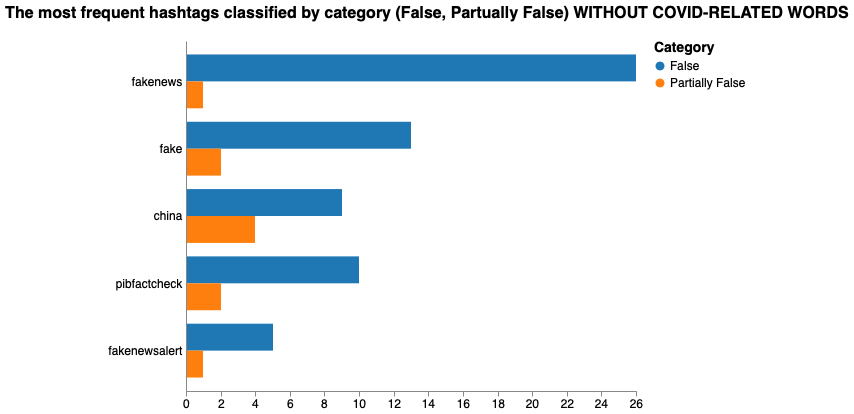

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiYdAM0VwAjgzjijMJBCxIyEHVAA29iDWM04snUwAnq5ImORsisEAFABiSG4QcFI6AApIipgM8W7BcQlwAJQ6AOoAkpoAEgDyAKqaOgDCVQBqpQAiALQASgCiADIAgpo9bSVVXW0AytIgAO40svRoACwCAAwy8DRkWGgAzOsyOEiysjTiZGgCMmqYbnBooGEAHphoINpwegZGphZWNh0dgcmCcLncnm8vn8QRCYTIEWieUSyTSGSybhyOmRhRK5WqdUaLXa3X6QxGYwm0xkxgkmEmNAAXg9UABGABsMjYxmMiTeqAATGsAL4yWShFCoADaoHESAQLJAoKY9xmxHiVggaBlIAq9kcznexiQAGtrHBZlqZDi0ALOSA0Wpsrl4ok0KyZFA2AwbLaAOyi0B6kFgo2mh7W10s1l7GSOmjO7FR22e72+tkCQO6-Wgw3oWDnFCR-JoACccfSTsxLpLqGWqZ9-JjWeDBq16BwNCYxqgmFgcCgJpmNrZGwdlYT1aTtYFDfTrIFLZzofQxrN4gtEHicAyw+TqGu44yk6xI49IC9jbQ7KXIbzICYDEUPrOe9rh-jiZHY8v6czUiDZd72QcUKGgdI3zdA8K2PL99x-NN+X-QC73bB8GHuSRiygj8Jzg2sEKvA9bzbd4xEySCWVw2Cp2-OckJI3M0IgY5zko-YYKrU993PX9+WWRiVyVGAzBOdi604k8aygwj0wEgDs1Q94kBwHAPAYMQxDcBZ0nYcSx0-Wj93rC9EJWQT7yQUwaCgIsQBHEzDO4gj6PMhTWyY95ZjsTAt1U8THLwoyXNMoj5JQ0j0AQGhtNBSIAsk-CZNcusLLQ7dd2wllApo5zktCuS0vecQ2E7KAEqPLjpJZWT+KKjsYBoBxzkuLKOMqqTp3yvj9nqkAsgjez4MS4KoNjAr+T2PqmBiuAwkwVk1iWnAFAMcTxqc6q0Fq3r3KAtCTRK2Z6DgHtfPWka8pqlKpr2pT83SJB1TlBEZp3EqzmirwJAujqkuuibdoizyHrMCh4ra1ANqCq7tpuvqVLUpANLYL17l7GhSH0y6tqh+G7sih9RJNFrxNnP7RujfHgaEqBmDskdyc2rqqcBqG+tBM0zBYiQvBm2LAl+5m6LZ26afvbS4CYHdsYp2G8dFvr7iYJASqwoba2h3LcZ29mCZBkA6HiQXIaZmHcd4sy9fFtCmGJlqN0tIXzZZuHFf1oSAGeyA8bYYDlGAAEuaFE8R1ZHLWqtd1BdbFxTCagRQ2FmcOeJx6PyZ66344N+IyB3BNne16PY4R4wcDJ9ORazxcPfvY4ScMVXK7lnWUtrm33jgUgbCFVlZeF-dM6tjuc6E8VZjYNgzjtpBGoQFvB5Cmu+sO5PAm9RQzqtDWoLN4vq5HvqHDnuBrBVnYcCTsJDEXl3D6I0ePKEx2vGgGgP8oO+D+Gtmn-25SjI6AiTYAgQIUA2KQwMvfIe7dj6YDMBcE6Nh4ByjUD9U2Vdf4rzrulVS6k3SQ3PEvKCltH59U3tYQhu8WT7yjg-dM-97ogC3OII2EMaHuiwbWMhjC+pmBwBEN4RDuGkLgbg94BYNzUMZqIgGODO5RT8D6Gg8xrDf3odgo+EiOzMG0v2eISxMGtxLuIxRIBjSJG0tLRQNjQSyA0Z1Bh-ImEJ2UIOOajj-puwUWPe8mA2D5xOooWYcBwziB3meORXC-59QEK1ThgpokxzMX4tC-w-DEAHjAmcqTn73mEKrUEdMt4Wi8ZTHx2jzEmgYLMJAdBxLEJyWI2JOiQDIEUIocp8tdauINucM4DNYEmOcbaPqZ1+yDkack3hLi+pnDML2bpbdWnmLMJLYwJUEFwFKuo4xJD5FVLSe8BA0AhRCmWaY1Zxz0B+lfpc0Zgpj4viQIEeg3odjnX2c0w55C2krUUAAL8MAAQ-EJqBB9hVZrW+T-ZeRz8loQGQmOUigwEPK0X88x9BVYmkib-A5KZrmIveCrWQ+dFD4pCoSpJxKAHoHXIEIZuSRmYr4W0kOVK97JN6X1Acyd7AYvhVim5D44BuFoAwBesLNHCvZeYu2GkrFctoTyvJ9KQDCBoCTC4FokChPmBuL+MqnFsrmW0k0lrzlrCFd1BFGr5CqwAPqAHIwQAImCAFIwQAomAusAIxgLrABUYNM1lPD1XMPgIYmAk9FBcxVUSmlvK2npHzjYawyM2HimNYkuhpq5XmvMYkRQxAbKDVkSGu1IqSXoCfCm4RiSmlwpab4qtGAwluCMYk6BjbVV0uYd5NgtrfnytFUdV5g7KmVo1SVQwigTjyg0sGhNKVWR9TYVAOAax2TZO7TErOK62mACE4QAIHCAHI4QALHCABQ4QAPwyslLIun5E75zTW0uIWQ0iIBOs-fendKS2b7vMQqSl37ZUVqfW0rcQGRHlqHU2cZbgGDAdzaB2D4HQhPnFCbTtMzl3wOYNukDrM92rqYBABgOBxQ33w0hwjVt-2itkJEGadgulQOw3+pWNBLARCvmwRqM10Gp2pQ+tkOG2luFRiaWQyc2GvsLqx6Du7aMI3wcjTSqt2GYZFjS2Z7pppT2ZCtU49xINYYUyJ9j4GGA2QWFLUBNi42-u06J8xwgpXIBgAgems6hzyacxZgtqNJzc0EREpA-M6CaYJcJnTbI+WvHOBjCQZhpaYnUIh7xv6iMWoiBIJA+qQ4Lt89F5zoru5G3FV6JOcpi3Pgcw2gjj6UPmJ8GYHwnyZZFZ-TFujLbgsDjrVEszusesavqac9LFTMtKbabZQDU9BMtKXf50VW4YoRAmz0krLaoBMHEF6Gws7UY5eqwAW9qxtlZWWAtuDOB1+tarlsttRXKHbC3WZLau6K0ItkLtXM+y2jwKtxAmlCCoH0O5mWLeE8N+ZCxfCdKQN6AbachtbY1SdQR+jS1Ra62j5hZHZCTwVBE-QKDrW-ceSNvtZ8QcQLUMycQWbBsfem+YgZEgFByfu6jx7Gq1xwCdfcqDLOiJU4TmwYtsg+6lmRZD970O8cJ1VukQITUPCvrqw9-7GqvSS9vQoCuwuFe8+Yao2YUu1gXKNz+mHbS-CgMDs8CnZrdMcuUDInHDXzPa9NxEBQATbJbmd3m135jE5+mD8h0PoqyAMDOMcQncuYki7A+Y8Tr6MGmb8z7wmq2X3OACWYKjGXut9XOGEUpVXI8wejy2igUqGCQur412vOvjtPQKxAYgH6mB2BNF87nKemuirtmEnVZAyXN6m6L8Zs69vY6E7jk3hNjQlmt17232L4AeBvsj0NPOc8GzNPoE+lXctT836KumKsFBbngw49f1GW+xbafAJOt+EsqST454ry+DZQFkHKkfwy0vxbRNHb3y1q0QGL0m1L3+RWgv0VwNmQA8GUG-y7S9zgPMWsFoA3Du2Z2N0PyEllzaywGgHbxq0K0H0INZyvwoM73OCD2AMm1AI1TEECA0iyGUAHU60wKQKEkLWLXXUSGeDoBhSz1-yIPvFgF0kwECCdUQL-yEnsBoAVGbmYM2yUPvCTmQDYXQLYykLQl1wWFvVgEUMMPeEKRBwyG-3qyf2n1T1FSvleVpEUETjYFB1sK11oJbVCW5iaj33ymzx8I1TsDOA8O0nMJCPDTCQyFH1NFJg0Mu2iMJhskCGiiiJn1f1UI6Dfw6AaSSL+xSINgkClWeGMNkFvUyMcJbU5hagkDPzlGqOH1qOeHuHzmaNb3xyYIkKXwsPQFiPoEsHDE6JfzDwlxMNLFMFVnXVGLF3-yTk8LmPgVeS3GMFOh0OfH0CfE1wP2KKEnE0HCkxTgFH7l4PsKwLoMlydVvVl2WLaUyHEHE2Y3sEET5lVHOJL34PvEdQf2oJt2+PSRYiQAAEevC9isiw94g54IhZ0mcUch8ujCZZ1ClDA7BxAnUZDvMnU7AaB7jsV-dd9d98SnCk5hDdjESxiVsyNBFMp-iN9ATJF6DasEFG8YAYD5ZLiW1xQYpAhJYSSW0VQkBBxGpDBERScO0CCAStC0JuZC85p4BiA2AwgBSNVAAuEEAD4QQAARANTABeEEAAYQQAJhBAAOEC1MAGEQQAQRBVTmFABmhkAFuGQAKYZAAyhkABKGQAa4ZABOhmtMJkABV5wAHQ7AAMhsABQewAF3HAAb9sABKh70g2QAVdBABN0EAAvQGMwAQ9BoyhJAACxUAAGnQAUddAAl6zTOkOgAHALOYlAVOiEUMWhMCHkEGQExLK7nEElx2XrPQBKlIDcEaI73O0KMpz6k7MoMSApJoMhNFQJ1CAUBbIfHYFCRUkzy00kP2OkOOw8IHMnNmAYHRKR3iJ83pPsNYOYQANj1eWV0nJwA3ClQkC5ylIZJlPeEYBsESN3JAMZPQFQKQEZE9hsGIHhP30pPmIOMekZAaLYB-Kh2lP6JYRpKEUfOvL3JfJAA3nFRoGEDYA8DcFAvl3AsXKMIiCk3VEnKblfXmHoCNhyEnPEwQBVkUFkEi1-OHJqLYO2XlBgoRPopaLbyqw70qLvR7JdypO22XOq070nMABE4E9QAYjhABGOEACo4Y9A9cSwATDhAAmOGkqUsACI4QAPDhJKFLAAMOEAA44QAGThABhOEAGo4QAQjhAAJOGlw5ItngsSBKQi1cOEMnNkAYBqQuEA2QCHKwpHNqK2JwEfDQLcE7AH3nL6OwrvLbXoFcOyEnL2wl3J14pD34o1TIDMFBHoB9BsQSVgufNvPQBmlQsCRsniDqVa3SAXyCIXN8tCPSHVGopsuji5J1xUXiEasGwgtIEiGYz+NypYPguyvlB4KfP6vytMk4oHNIoTAwuTzYqRINkx3gzrM+NgPgpwB9EKSYHapRwgrOCbKCGZCTnIvIGsFkG8pvIgp42JKSqjxSvDUbBagCXEGlmFPZJuprzuqV1awwjuPeuf3-OAj8BKrcDiqcHWpYxGs0IguGLnzUA3FpMOONnOrgrGtI1fVeX0EUBkxytYp8oYuYSvhs0nNUNpNBF9D+ocPYoPIiD1x4shuSJqvDT9neQYE+QcwwIuPgojXbUagnIpv3PF1TRsAgCqP5vgv7M7xmvMz-L6jHJVLFrGq9FkFpoNxPIVogvOFpAlu7PpqKMZtzx3BmnBJlpm2ZI0lVohr6qhoivQCbmCWhLQXUHiClrsLyogoqNvXkClo5q+LGqeoCXkDcEfHE0nM6QgGRrdptpAGOHd0nOFLCD9BtXVqjtoHuF8kKXBwjtGogvoBBpWs5PgsdhKjRTauTv1oWv8PkHJt1t7LtyfF2UnO1o0hWlfUQCvNxouqjqbuBLlGQBdu8PLtpgmIt1uNBG0mNrms+v-2HtvQQCdzLvxvF1ptUEbrNq4GyBwLgH7ohMXtzggDNESAQCvh2TYTXPdzNEDvuFUKNgEyzutsHukOfEZCTkKW3pNoCwVGvyoDjpBNKO7lQp9HSDfsnoBrQi1UbvRIoFfRSzzprr4tAbIlBCZXeQVC3HbMxj5t6L4L9ouDIECMws7ofoOn1Gikto7pRogsONDqVXbrorxqpsJmUVsgEx8DlD23h2-oXoYYNjOGgF9kA2AfofmqEjMHkC8DID0NgatoZt3uUOwGsGWrgeSoQfzAi1-AgQSEnPVEwggQnqEantpigENyUdupUZAEsEnNcO7h3HAUahu0nJQNWNobAsIdkfvBmgn3tguDXLLJKl5DsHgHPicDepMY+rMZPkCeeuCcsYiHXXWLHsEdce4aEnXPRPWIuH7G8a4eEfvFSZmMaiaOyYMdyY3JmPoKoOkb1rcaRWIDBQRHEEZBBUZEnPRMT2aiydCf+r7LXu3hcsCB3MqdroLReUCB5juGZsbuFPsDYFnikzIboaSZybQlCTfQUAw3mAgCk2lU6cpqWfeBwH0AVPYE7H0LM2auYXAm2cGfgb6nWrhtPI2tNHAIHLI3lqwc5rGvmHWPIrYCZXbVopcYoa7uHt+p2YFoNjgFeCoTSyKfCfgHkAgTEdXoms729G3ORdywHOmPn22v3wgqOled+e9FxabSjrFICvEwgFjyYBsV7oUe3DvpkeScsnDvlEnJByATnwoAIsCyjAcrkIIsyZTQIpgGTnIrywSBahgBkNODsAcbnkehBFnVPIQFsm5jjuYpjXRNDvlBUlFZ6OueUb6lFdfSfEFVhemnFWVPsH20hSOxRdq0SaBaIfeDCDpgWDLLpj8BJZoxdfQHVCgAgWkR9cUz9YfFQsxmcYBmCLDYESER2R8F0akc9w+Ygrf0+k8zYQFYtbaXWV8GMFDqgHEFnXCOsED2FLpG2FQsnMOp+G2GQAIoCTwDUDIAbZzexVVkZHU2RnI3HMZaqeZbAYOf7y0cxiQFVpBKdcjrDeOA8V6vIeneqeKgYBBLgFXcZHkBViDo8NPKhWQBP3lYYwWDit41eSRmeogfd0wC8snOlmNEKbBcLuVJsnDsZxadkB437aGdHKzb8DtoUGVyk3Za7AgnbdFRCVVnFEbdeVFdQaeiQtIC-ZudfyKS7IqYXezqjqkwuGUBDe9yjq8q1XncX2wYgp7qahCcNdMdhyvn51fgynwdmv0bMdpGeCF0fbGpBxxoWedaXaiicD0cWeKbQhmd1YoDeao7CY5n8ogGEDbW9DEFpBVjbY44gqsiZVskxHXQO0qoId48HaZIdY0lU0hXHocaBqDd06Y6E-CZWb2VU6juLVQrLYTFCUMB3CQ6NbaRhqKQSwkHkEWX1Zcv1Te2s-072fQB84fLwKhdbtkCncw7DeijSqKUB0oRM0k66baR8B3FmLA8FLnzfXlEwcy92eE-eARC6vEGJ0wAAG5JzKv3oIFoo5Rk2ePF2DPbbZt5BoogCHOw3tHEBhrSvwWX4LRXCUCIsXL6Y8T8uNU-OFR6u5vTcLcrd3nfa1OLh7hEgAXo3qq+OHxxM7MdxuOqrwqw2SoVY5OT8PAjzqKo23YY2DuvLwCMIrPpaQHj40qCnBk8PznCZBk0VhuMP76DvxV4gcA5XlvCZdDBETXQ6FG83TpLHxNlBxRwcj7xN0iFGUeIgdIdXGAbspU8B3NFWsBlX87bKxrHxXNKKzXJzWbIPTmnvOuMBIPzhWniLGAoGoPKemrC6dj3vXbEuDv5g3BUGWmDAQrS7+uDvDjJNpM9hb3HpPNMRBPwvyv0BCkEBPNIOQcHBSHqHw6UVJywh1coGrJmbyDOK4qYATRBdNxLH6l7gzqMqheB6DuMN6lU0sbQdcsbsz4PBrB1jOlduwuOuIuQAjywhHG-v4L5hlBPkHGWJNHoeDYm5VdxAJvvW+eOqo6tUdf+nVCFRUtSBTBQFRTRXzaEfNO2vAWI-NfTJaanU57TeGBnhjg320+RG4BSb+VabJz4lu7JzClBwVORv4L4gQOVY4qmA+uJ-FaZ6Zd1lIO1zgEFRibHweN0m4797+04-OPXrtg491eG+zHZ1kATR3d-ZT+RfWeJ4p5iP6+7-I-rCj+XKVAKLiu3DJw8HvaDCsO4qRqBizlCa1UYZAf-mcyfazAGuVgBHLa1nQVYl+CXUHqzwqIRAoGL7NcnYD9BK9u+94NYmEkbygJlS62fAThVpoSNJybAIChuFFYfFZerPaNDdnY4L93a6JDcHXz05n9V0jvcge8G0hYx+BHYU0JOSYag4PKdSNhgWAZ6qQBOjBTAHRz4GMDI+e2QAi5QkDKlV8XA8Pi-0b4QIbE24XsLf1QGR9vAiAcdnKUBQoCmWkffVtL20jrFx+IPWwY32YGyBua9ADDARTqRokwsLxRjh92Y59RcCxjNgYAMqx+9QuQQmzmXk6S98k4rlAwfcDaxPg4AZxdbqtTGowBqyScZ4OAlR5sBLA5wd7j7SyEQUZy64A-jnW3z2BAhwvUwY32SxTxMAzwVkE6kSoqDG+uhFPt7xajnABA0aM6ieyfAUdIO4KdEEXmEHR1UKdVeNvPS6FmMwBCw8IWGwgDKB1cIOUAYoBfQlcXBA7SPmjDszA92uegsxh4FFZTDFhCMSIK-EEFwAYAT-bgWcIoRAVlSWSaYaySPrH1w6+2AttMMg5Jxj20whUKIS9AONZop3Z4Y0LMbJcJcxNU5LJyn7kEHGjuGyAYAjbihuCk5QILEV0bQc3kZ8ULEykmazpA81QqOueRNAAA3zENELKEF1FarTbYOkEo77Dv2AlIzmIEbzblQWqwg7rSGnid9ee1wtpI7GH658dqlIi0GeTgAXk9CFIi7puFXyedqOM2J8OsXXK9tKMkovFlHQOarMnYuo0lkl0YKcNRR4xTioIjRiBA8A7vHemgOHq74WKpwmEd01ppHDKKD3H-OdwO58gpUEOJgNPECB3cnhugt0dl3DBNkThz-CMQBkg51J5WTUPLMgDSpdgw+MQjXmYw3hPg8AtjIqrQFvjTC3hVzdkch2aznB7eFASioLnRKzcLRpWBIOoQbG+FGoYQKvokB+EQA7Y+bF0bGNcHn8PCiwOfDzDpL8jWexgKVCyIk5livOAGHcGaB0GZieBbSaWAVnqEe9WexdOpIEG4KhVZxaoy0Q+zCqkcCOAgCADYIOGN8EEqhHHtMKhC+Q0a3gkEbgFvbgIMIHgNcrpGBI4pohDQgcWXl8jnBN4rTVUVJ3+SB8+x0IgCQ8WfAeJ5m-Yq8WY3XTXsWmsAQocUI3CKiDuarZQB50vEcj0cI4vvpswsFuEZivgMCVl2xRwS8U5FSiaeW9H-ikJfUANpZwgDRoBmB48CQqmUAXAnUgidajvnUAIDUK-MJccxMInMJzA0KP8ZuMj6aCw4aLSWLOmOBUSyuZjP0AAA41gbLaYd5FCAAByE+KpGsBQTwxMEsPGHACQpw7AmIVegCjXTGdr2UvN-PaPfqioaBHOSxjuDUDaQu2ijccYcJ+Dgjph61LCdMOsDEAMxDIqnhBSDHuTPuq49gIiz2GujLJoqFrE3GMyYBZgKw7idRNFQ0ABQywVgSmw25d06hMUNCrqz2xQ8WxGqJjKyKiqPDe+G4h0QpJbonQT8lgNKYhKkmEw1A+gHwQMgYFBT9BlYewGwgpQop1Jo3euGYB7h9gl+bfGNHAAzGSTyxmU2dHHkbpdhcuK0kEaVQqqm9xU-KHXo3nMnLiXh4GMICcA2nyTG+MmOAAKBKhzkCpGk8ZPHUmRcSSOGvEUEmhUzV9jRH1AGWHiTgpw8OusMGZlPCTKCTx-01eLUnqSBDYpV4mGdyTCQYl3U3qP1IGihkpQMZbBdTHFBimPSiZFzViPSPJmy1FAtaAmWzApmExOw3Yb6fACmQgzn8TMg2LyI6YIyG+3MoSPzgZlZxBZ94JQZaAY4iyrYYspFGPTJkdSY4HMQJAqR3CVCqE0soiLLMkQFNmek9bWfmHpiaz0wBskAHGzHHlS9BIoAALo3ARxE3bUE8FtGKhaQ9jGkL4BuztgpQnCaJNbKzByEECq4GKBXhmCQsr47wCjFKkoB8QdAAAPgAC8OgdkDoAABkKcnQJHIQDRzEIOgAADyJyBQEeYUH7NtksJNOE5aULKGK7vBRm5cmYAHMVBA4-iWzb3o8DkAShXWYWBgTl3sboASUooM2arA6LoAtgSfI4CcDODeMY4lAUeHS3eDPBwIDAhuQIJKGgc5AoCVuagFAAUZJQSoLuYNB7kOJ-WGoB4APK5aKh5giwEJknBfBoBWSSQEALWzvnPgH5a6FkPfKzBzz8wRVCGsvPQC4VCwsDFuWxC3ntzQQnclUAfI9lHyQAZoQWGfKHkshQAXARAIqGYbhBIgi0EAMKGLkyAkAzwCuTqDx449Xyp0OtIvMVC1ztw9cmyCaAZDMg3YgOcVGkFOCkwJIj8gZJCxiRMK3AMQOkPQujCjxiF6YcNtgFAQzAKF88yRTIB4V8KbAAi90IuFLntFTqXsp2YHJYTpEgxsDW4KqHQANBxyCIDhD4HsnfzUeMwBZP1jSz+tfJwNGYBDJYWTzLg0EUyPBgQDiBHFbCrSZ6G0g4AKgcACZr+l0VwAqgeEkRU2wkVaLUKkwBBGwDNANAf57wAAMQ8h-hmiyitEtiVmhigCwJYOZlkX8KmQgim4HQHuByL6QRS90AJFLkdI6JlcpUM7Iq43zjG5fBeKAp7CeJQFO8iBQwK-kWJhSniGQGlW9ABVBYfcgBDgpkBltp4SCkAAoxligKxlyCuuegCoXdzoF7wfuZMpYTbBWuaikAH0tHm7AZActRuQmNyUwAoghktZXAEMkFBsFpcihfsr6VvF65jSgqqvxkDnzIqEzMUBvJAXbyO5q4AZXWkPnvA4F2C3Be0nSB1KdQfSqijvFaVtzulwKlCdgpuDvKzZ-WUOfFXkBtz5lXSRZW3MkUdhxCYKhlOtPRWtpAlyy6haSp3hNzXcIAJ3KApJXMrpFFiDZcfPgynyZAzwAUMSpWXsq65MgbRlYG2gDyTFINVlUKqOEQ1yVsCylQPICSoU1AFcVlbsraroBgAwS1ABnLQxZzEUyQQyZoGdmGS9VmcygHAuNUJLGw5qy1WKrgDChIVOCkucKCAA/view)